In [1]:
from itertools import chain

from lvmtipo.actors import lvm
from cluplus.proxy import invoke

from lvmagp.images import Image
from lvm.plotimg import plot_images

In [2]:
await invoke(lvm.sci.agc.start(), lvm.skyw.agc.start(), lvm.skye.agc.start(), lvm.spec.agc.start())
await invoke(lvm.sci.agc.status(), lvm.skyw.agc.status(), lvm.skye.agc.status(), lvm.spec.agc.status(), return_exceptions=True)


[{'east': {'temperature': 47.25,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'center': {'temperature': 48.0,
   'cooler': nan,
   'binning': [1, 1],
   'area': [3208, 2200],
   'state': 'online'},
  'west': {'temperature': 47.25,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 KeyError('error'),
 {'east': {'temperature': 46.375,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 43.5,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 {'east': {'temperature': 45.375,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}}]

In [3]:
exptime = 0.1

In [4]:
await invoke(lvm.sci.agc.reconnect(),
             lvm.skye.agc.reconnect(),
             lvm.skyw.agc.reconnect(),
             lvm.spec.agc.reconnect(),
             return_exceptions=True)

[{'east': {'state': 'online'},
  'center': {'state': 'online'},
  'west': {'state': 'online'}},
 {'east': {'state': 'online'}, 'west': {'state': 'online'}},
 KeyError('error'),
 {'east': {'state': 'online'}}]

Error on #2
['/data/lvm/sci/agcam/east/20230224/lvm.sci.agcam.east_00000058.fits', '/data/lvm/sci/agcam/center/20230224/lvm.sci.agcam.center_00000058.fits', '/data/lvm/sci/agcam/west/20230224/lvm.sci.agcam.west_00000058.fits', '/data/lvm/skye/agcam/east/20230224/lvm.skye.agcam.east_00000055.fits', '/data/lvm/skye/agcam/west/20230224/lvm.skye.agcam.west_00000055.fits', '/data/lvm/spec/agcam/east/20230224/lvm.spec.agcam.east_00000517.fits']


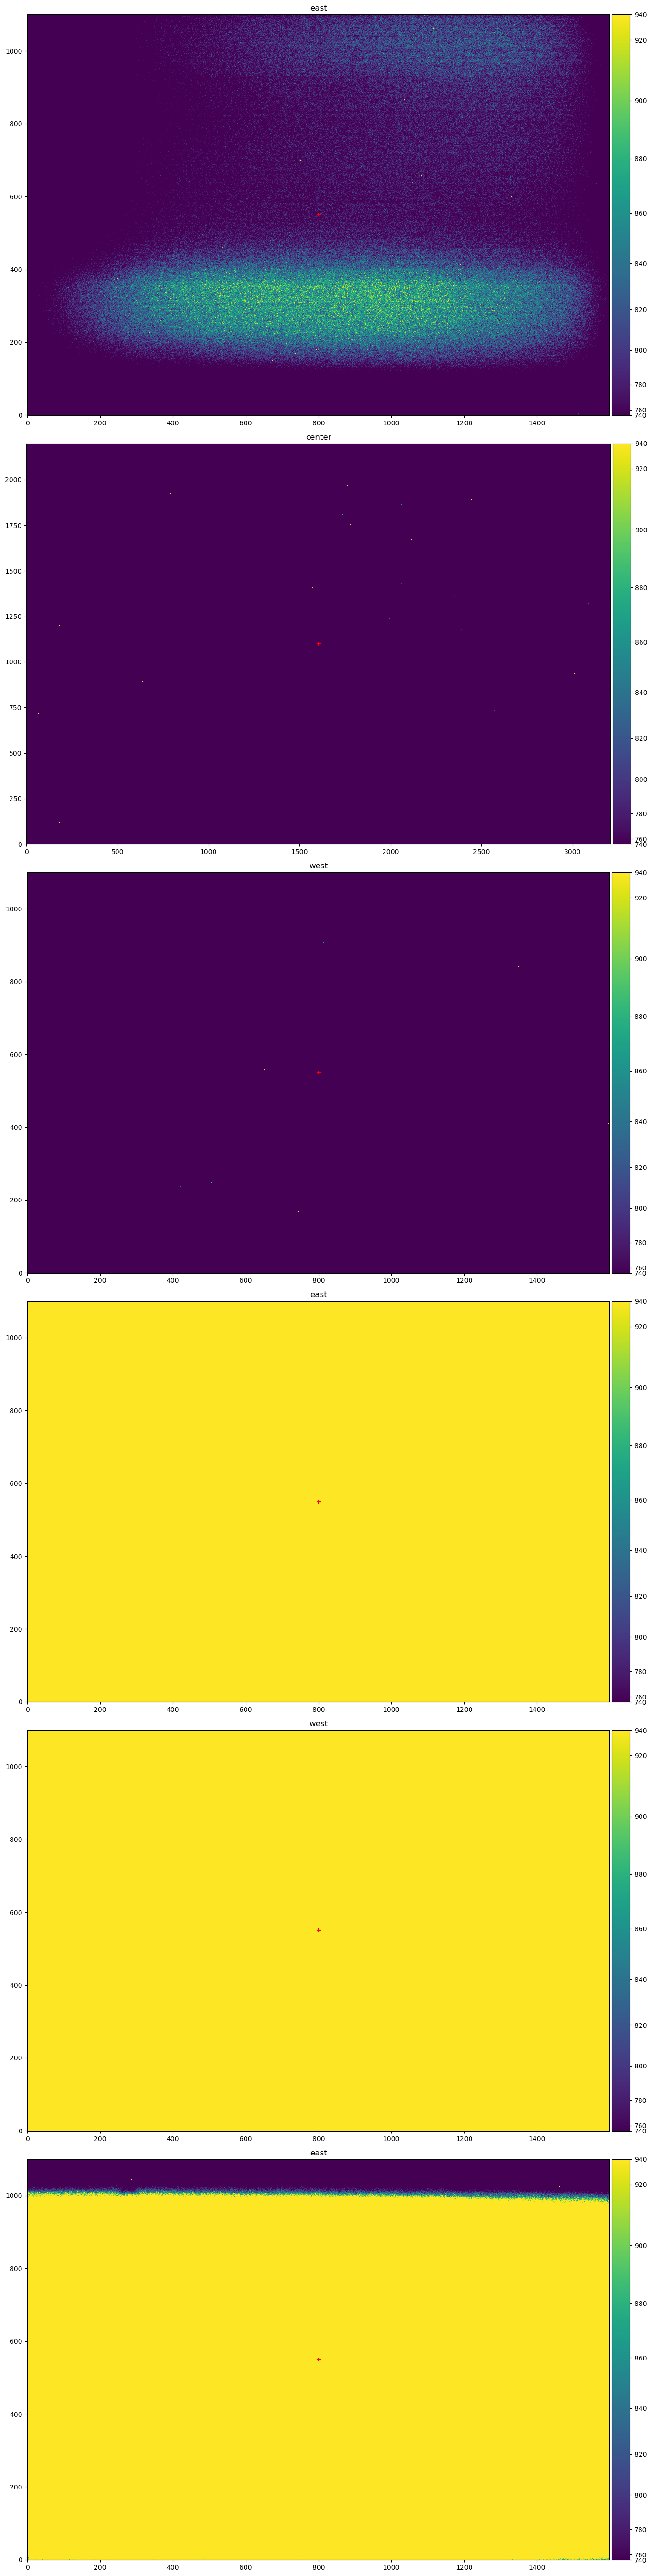

In [6]:

rc = await invoke(lvm.sci.agc.expose(exptime),
                  lvm.skye.agc.expose(exptime),
                  lvm.skyw.agc.expose(exptime),
                  lvm.spec.agc.expose(exptime),
                  return_exceptions=True)

#filenames = [fs.unpack('*filename') for fs in rc.flatten() if isinstance(fs, dict)]
#filenames = reduce(lambda x, y: (x if isinstance(x, list) else [x]) + (y if isinstance(y, list) else [y]), filenames)

filenames = []
for idx, fs in enumerate(rc.flatten()):
    if isinstance(fs, Exception):
        print(f"Error on #{idx}")
    else:
        fs = fs.unpack('*filename')
        filenames += fs if isinstance(fs, list) else [fs]

print(filenames)

#print(list(chain.from_iterable(filenames)))
images = [Image.from_file(f) for f in filenames]
plot_images(images, figdisp="v")


In [24]:
await lvm.skyw.agc.reconnect()

{'east': {'state': 'online'}, 'west': {'state': 'online'}}

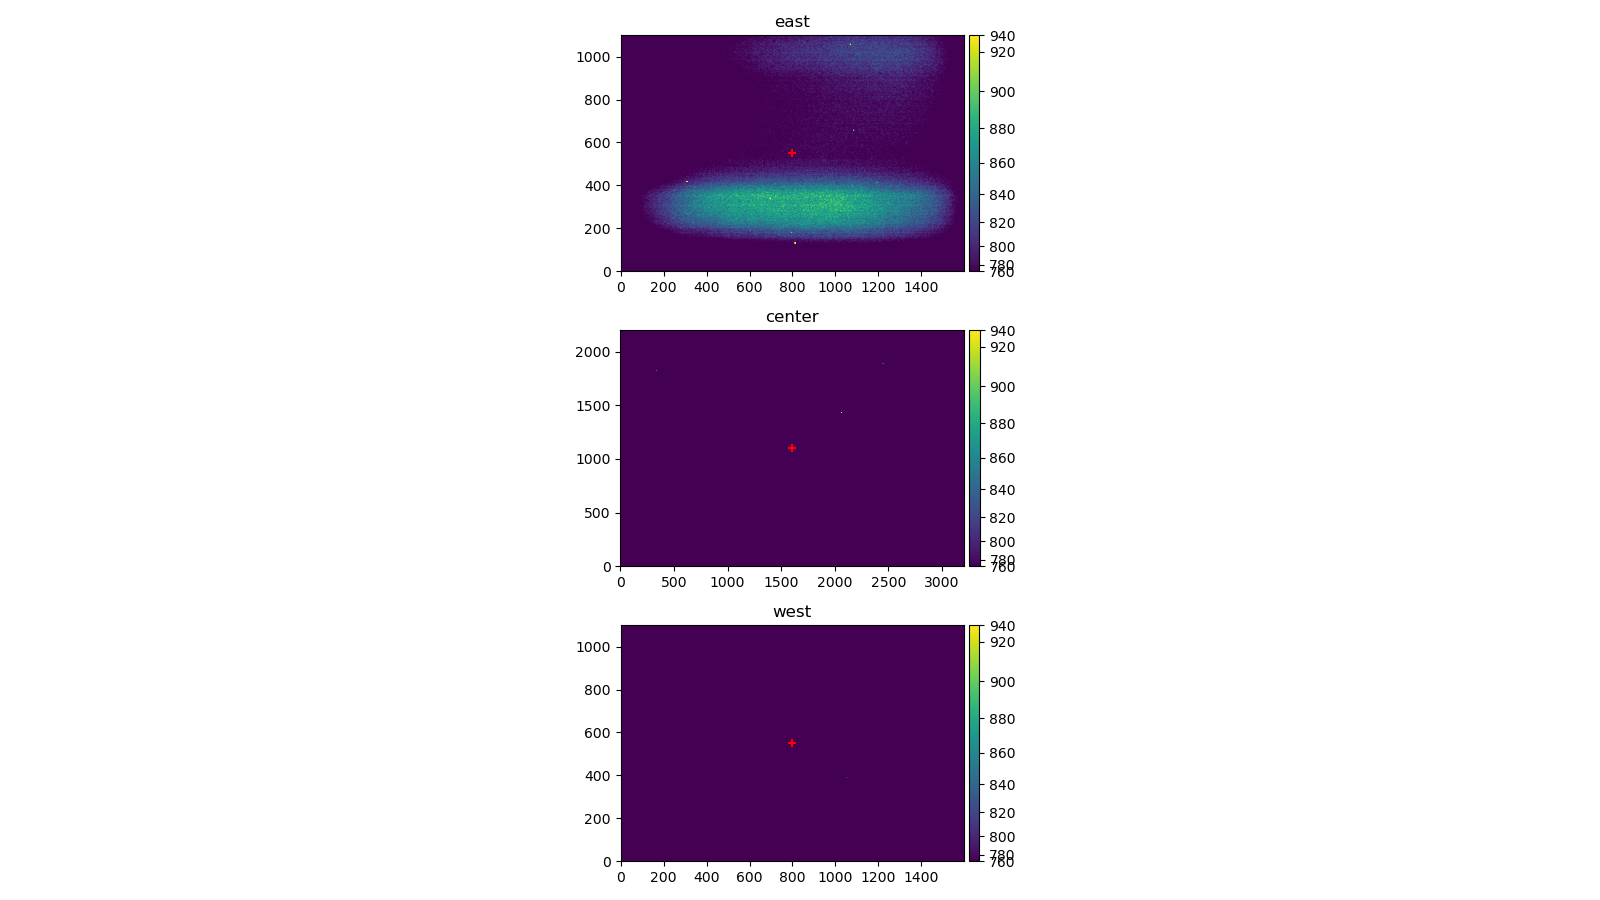

In [97]:
rc = await lvm.sci.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)

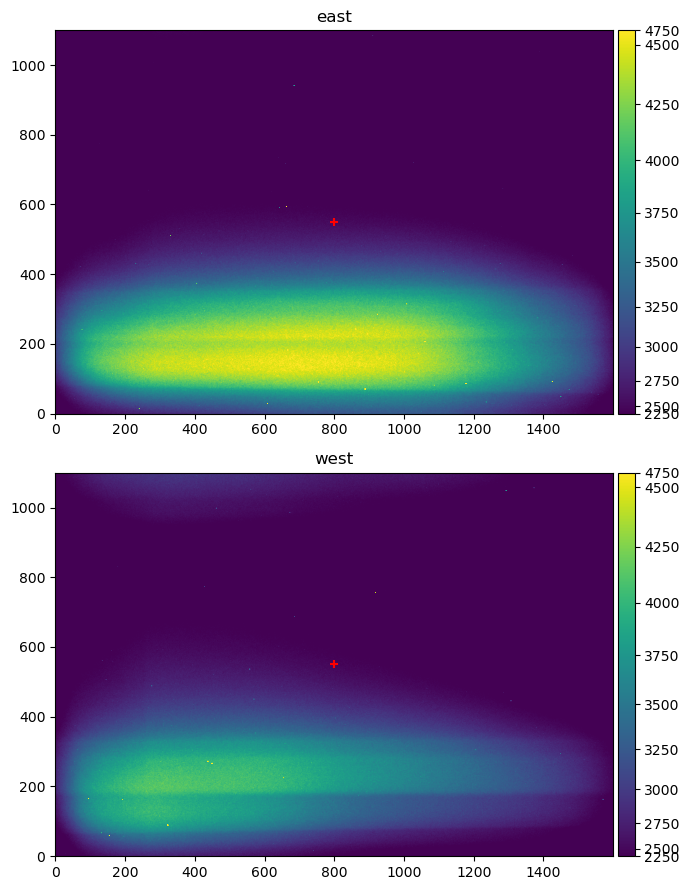

In [25]:
rc = await lvm.skyw.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


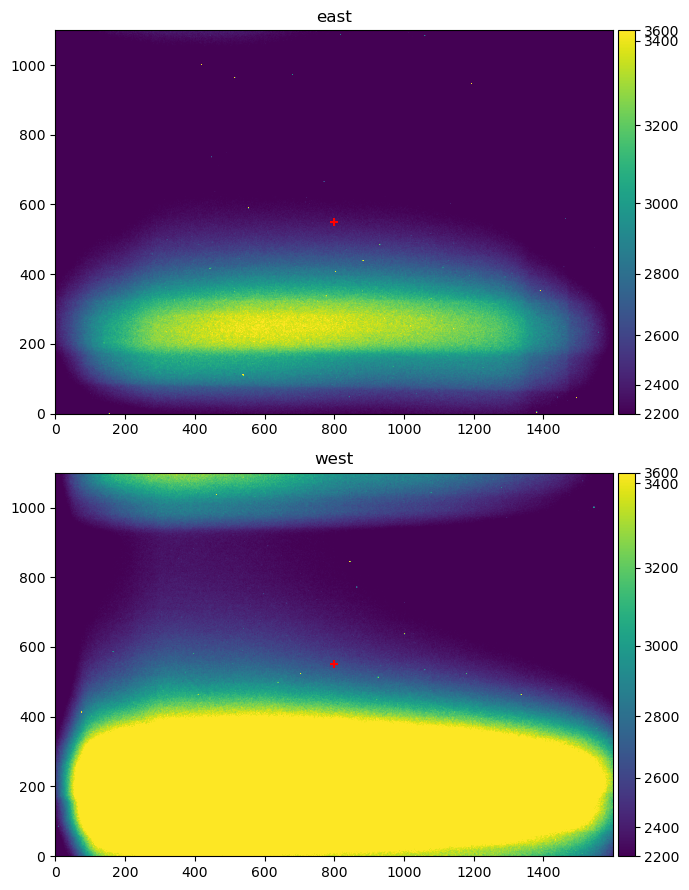

In [26]:
rc = await lvm.skye.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


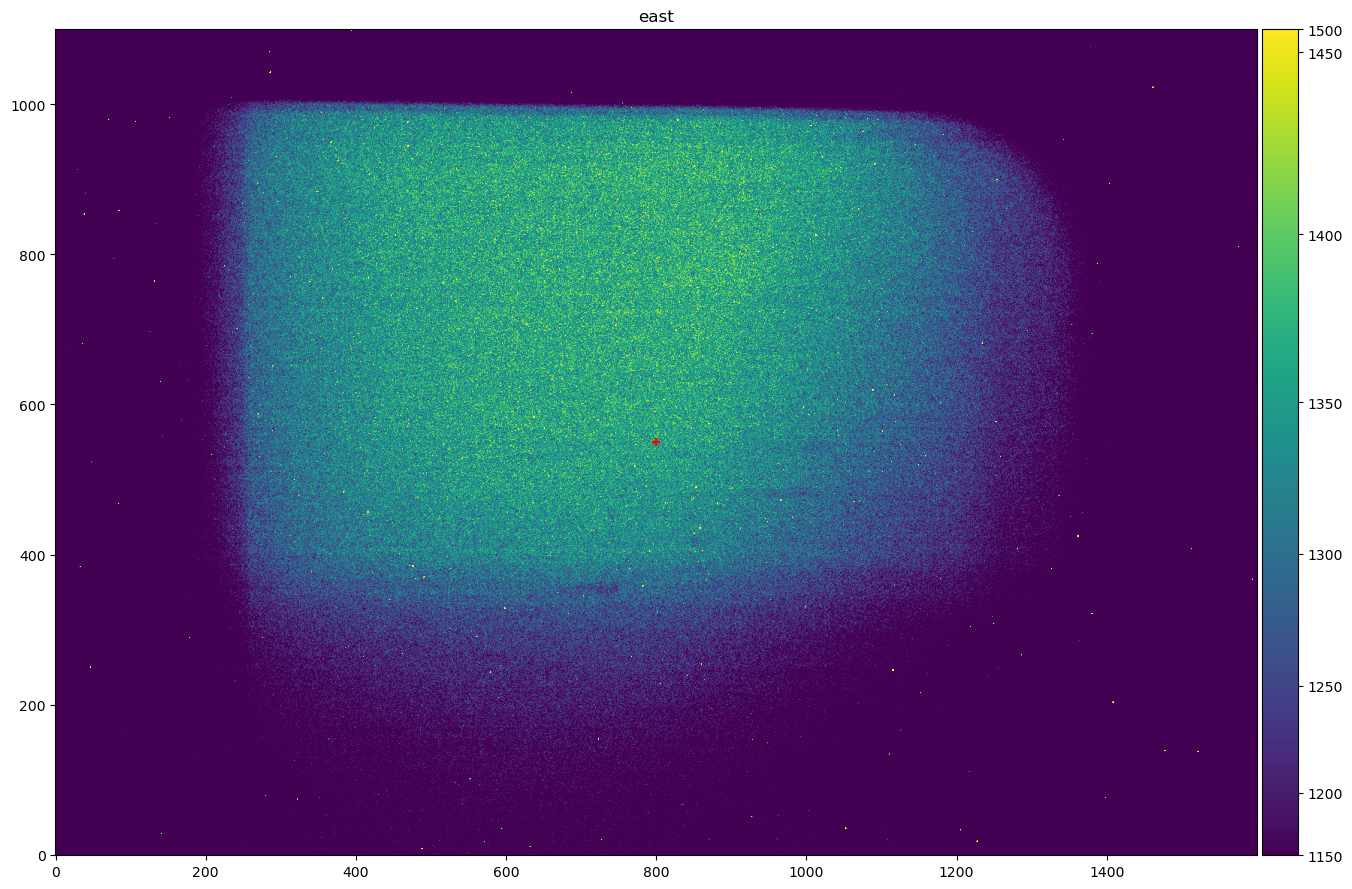

In [27]:
rc = await lvm.spec.agc.expose( exptime)
filename = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in [filename]]
plot_images(images)